# 데이터 시각화, dplyr 패키지

In [1]:
data(iris) # iris 데이터 불러오기
attributes(iris) # iris 데이터프레임의 5개 컬럼명 확인

$names
[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"     

$class
[1] "data.frame"

$row.names
  [1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
[109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
[127] 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
[145] 145 146 147 148 149 150

In [2]:
names(iris)
# 5개의 칼럼명을 names 혹은 attributes을 통해 확인할 수 있다. 

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

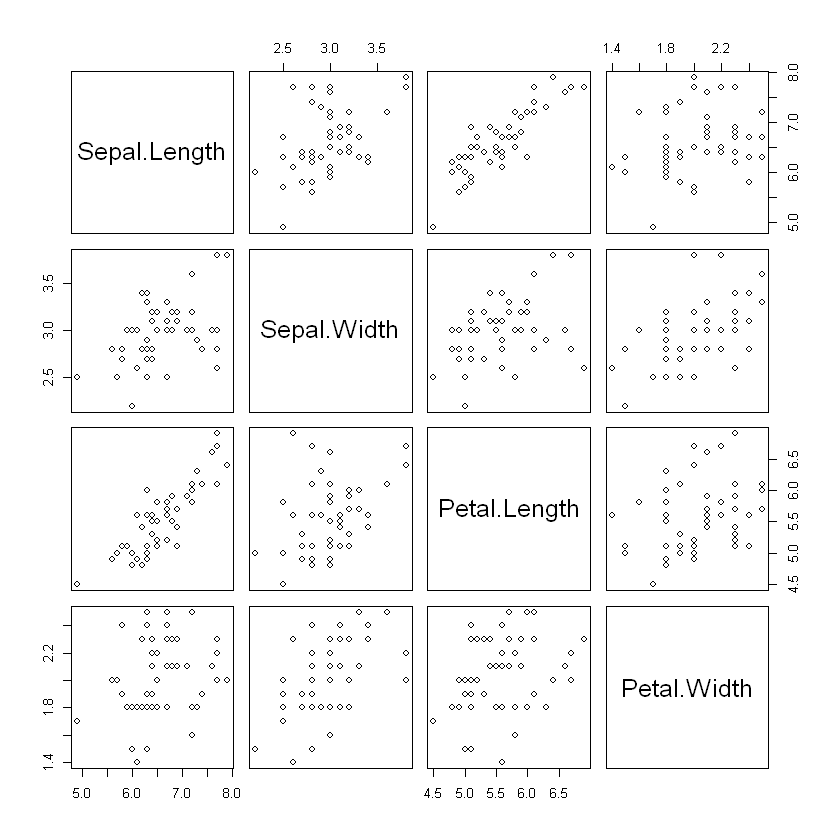

In [3]:
# pairs 함수는 matrix 또는 데이터프레임의 numeric 칼럼을 대상으로 변수들 사이의 비교 결과를 행렬구조의 분산된 그래프로 제공한다. 
# virginica 꽃을 대상으로 4개 변수를 비교하여 행렬구조로 차트를 그린 결과이다. 
pairs(iris[iris$Species == 'virginica',1:4])

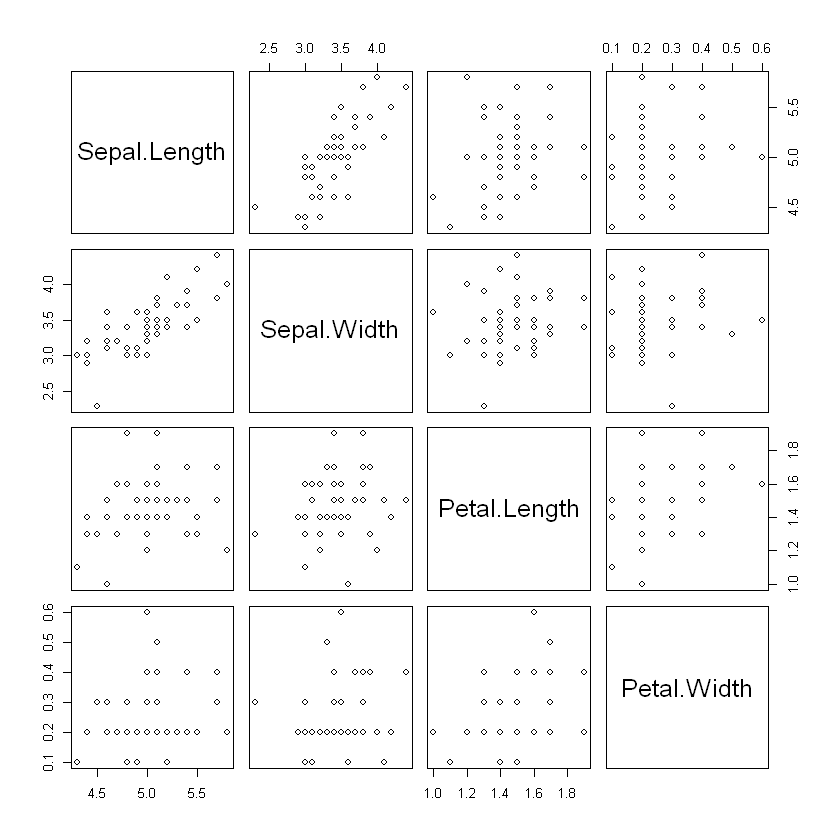

In [4]:
pairs(iris[iris$Species == 'setosa',1:4])

- iris에서 Species 칼럼인 꽃의 종 setosa, versicolor, virginica을 대상으로 하여 3차원 산점도로 데이터를 시각화한다. 

In [5]:
# 패키지 로딩
library(scatterplot3d)

In [6]:
# 꽃의 종류별 분류
iris_setosa = iris[iris$Species == 'setosa',]
iris_versicolor = iris[iris$Species == 'versicolor',]
iris_virginica = iris[iris$Species == 'virginica',]

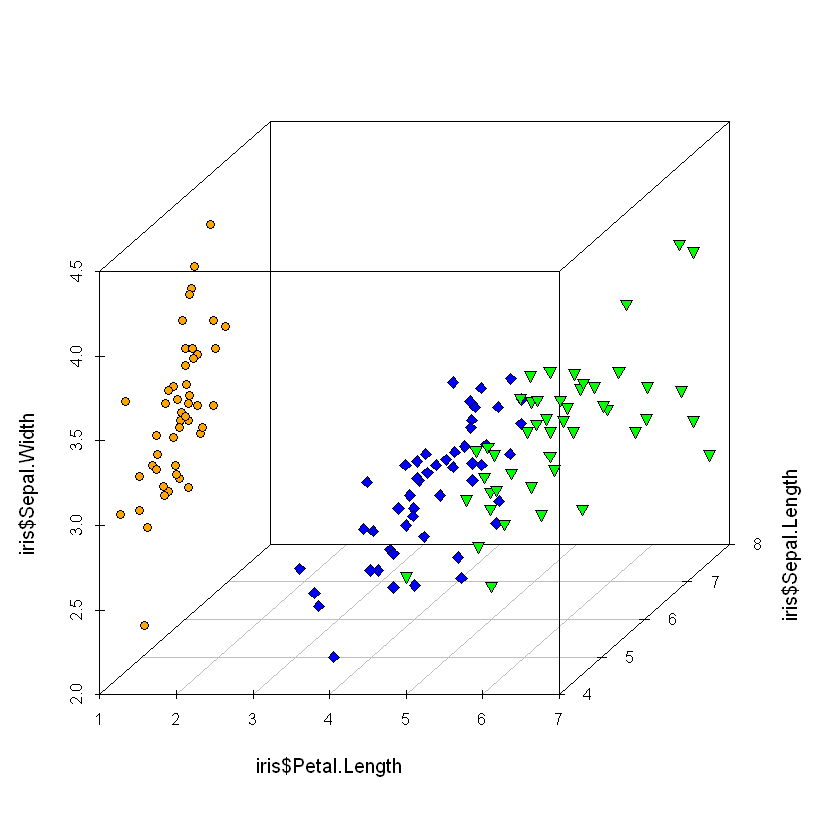

In [7]:
# 3차원 프레임을 생성하기 위해서 scatter3d() 함수를 사용한다. 
d3 <- scatterplot3d(iris$Petal.Length,
                   iris$Sepal.Length,
                   iris$Sepal.Width,
                   type='n')
# 각각 밑변, 오른쪽 변의 칼럼명, 왼쪽 변의 칼럼명
# type='n' => 기본 산점도를 표시하지 않음
# 현재 만든 것은 3차원 틀 Frame을 생성한 것이다.

# 여기서 셀을 갈라서 실행하면 실행이 안 됨
# 위 아래 셀 꼭 같이 실행해줘야함
# 예를 들어 예전에 배웠던 plot과 lines는 같은 셀에서 사용해야하며
# lines나 abline같은 건 독자적 사용이 불가능한 것과 일맥상통한 논리이다.

# 이제 3차원 산점도를 시각화한다.
d3$points3d(iris_setosa$Petal.Length,
           iris_setosa$Sepal.Length,
           iris_setosa$Sepal.Width,
           bg='orange',pch=21)
d3$points3d(iris_versicolor$Petal.Length,
           iris_versicolor$Sepal.Length,
           iris_versicolor$Sepal.Width,
           bg='blue',pch=23)
d3$points3d(iris_virginica$Petal.Length,
           iris_virginica$Sepal.Length,
           iris_virginica$Sepal.Width,
           bg='green',pch=25)

---

- dplyr 패키지는 데이터프레임 자료구조를 갖는 정형화된 데이터를 처리하는 데 적합한 패키지이다.

- 파이프 연산자 %>%를 이용한 함수 적용
  - 데이터프레임을 조작하는 데 필요한 함수를 순차적으로 적용할 경우 사용할 수 있는 연산자이다.

In [13]:
library(dplyr)

In [17]:
iris %>% head() %>% subset(Sepal.Length>=5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


- 대용량의 관계형 데이터베이스나 데이터프레임에서 수집된 데이터 셋을 대상으로 콘솔 창의 크기에 맞게 데이터를 추출하고, 나머지는 축약형으로 제공한다면 데이터를 효과적으로 처리할 수 있을 것이다.

In [20]:
library(hflights)

In [23]:
# 데이터 셋 구조보기
str(hflights)

'data.frame':	227496 obs. of  21 variables:
 $ Year             : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ Month            : int  1 1 1 1 1 1 1 1 1 1 ...
 $ DayofMonth       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ DayOfWeek        : int  6 7 1 2 3 4 5 6 7 1 ...
 $ DepTime          : int  1400 1401 1352 1403 1405 1359 1359 1355 1443 1443 ...
 $ ArrTime          : int  1500 1501 1502 1513 1507 1503 1509 1454 1554 1553 ...
 $ UniqueCarrier    : chr  "AA" "AA" "AA" "AA" ...
 $ FlightNum        : int  428 428 428 428 428 428 428 428 428 428 ...
 $ TailNum          : chr  "N576AA" "N557AA" "N541AA" "N403AA" ...
 $ ActualElapsedTime: int  60 60 70 70 62 64 70 59 71 70 ...
 $ AirTime          : int  40 45 48 39 44 45 43 40 41 45 ...
 $ ArrDelay         : int  -10 -9 -8 3 -3 -7 -1 -16 44 43 ...
 $ DepDelay         : int  0 1 -8 3 5 -1 -1 -5 43 43 ...
 $ Origin           : chr  "IAH" "IAH" "IAH" "IAH" ...
 $ Dest             : chr  "DFW" "DFW" "DFW" "DFW" ...
 $ Distance        

- 해당 데이터 셋의 자료 구조는 data.frame 형식이고 전체 관측치는 227,496행이며, 변수는 21개로 구성되어 있다. 

In [25]:
tbl_df(hflights)

Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,⋯,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<int>,⋯,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>
2011,1,1,6,1400,1500,AA,428,N576AA,60,⋯,-10,0,IAH,DFW,224,7,13,0,,0
2011,1,2,7,1401,1501,AA,428,N557AA,60,⋯,-9,1,IAH,DFW,224,6,9,0,,0
2011,1,3,1,1352,1502,AA,428,N541AA,70,⋯,-8,-8,IAH,DFW,224,5,17,0,,0
2011,1,4,2,1403,1513,AA,428,N403AA,70,⋯,3,3,IAH,DFW,224,9,22,0,,0
2011,1,5,3,1405,1507,AA,428,N492AA,62,⋯,-3,5,IAH,DFW,224,9,9,0,,0
2011,1,6,4,1359,1503,AA,428,N262AA,64,⋯,-7,-1,IAH,DFW,224,6,13,0,,0
2011,1,7,5,1359,1509,AA,428,N493AA,70,⋯,-1,-1,IAH,DFW,224,12,15,0,,0
2011,1,8,6,1355,1454,AA,428,N477AA,59,⋯,-16,-5,IAH,DFW,224,7,12,0,,0
2011,1,9,7,1443,1554,AA,428,N476AA,71,⋯,44,43,IAH,DFW,224,8,22,0,,0


- 원래는 R의 콘솔 창 크기에서 볼 수 있는 만큼 10개 행과 8개의 칼럼으로 결과가 나타나고 나머지는 아래에 생략된 행 수와 칼럼명으로 표시되어야 하는데, 현재 jupyter notebook이라서 이렇게 반환된 것 같다.

---

- 조건에 맞는 데이터 필터링
  - 대용량의 데이터 셋을 대상으로 필요한 데이터만 추출하는 필터링 관련 함수에 대해서 알아보자
  - subset과 유사한가?,,,,

In [33]:
# 1월 2일 데이터 추출
filter(hflights,Month == 1 & DayofMonth==2)

Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,⋯,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<int>,⋯,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>
2011,1,2,7,1401,1501,AA,428,N557AA,60,⋯,-9,1,IAH,DFW,224,6,9,0,,0
2011,1,2,7,719,821,AA,460,N537AA,62,⋯,-14,-1,IAH,DFW,224,9,10,0,,0
2011,1,2,7,1959,2106,AA,533,N461AA,67,⋯,-14,-6,IAH,DFW,224,12,11,0,,0
2011,1,2,7,1636,1759,AA,1121,N579AA,83,⋯,14,6,IAH,DFW,224,24,13,0,,0
2011,1,2,7,1823,2132,AA,1294,N3CCAA,129,⋯,17,28,IAH,MIA,964,6,11,0,,0
2011,1,2,7,1008,1321,AA,1700,N3ASAA,133,⋯,-19,-12,IAH,MIA,964,6,15,0,,0
2011,1,2,7,1200,1303,AA,1820,N589AA,63,⋯,-7,-5,IAH,DFW,224,3,13,0,,0
2011,1,2,7,907,1018,AA,1824,N569AA,71,⋯,-7,-3,IAH,DFW,224,6,20,0,,0
2011,1,2,7,554,912,AA,1994,N3DCAA,138,⋯,-3,-6,IAH,MIA,964,5,18,0,,0


In [34]:
# 또는 이렇게 할 수도 있다.
hflights %>% filter(Month==1 & DayofMonth==1)

Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,⋯,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<int>,⋯,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>
2011,1,1,6,1400,1500,AA,428,N576AA,60,⋯,-10,0,IAH,DFW,224,7,13,0,,0
2011,1,1,6,728,840,AA,460,N520AA,72,⋯,5,8,IAH,DFW,224,6,25,0,,0
2011,1,1,6,1631,1736,AA,1121,N4WVAA,65,⋯,-9,1,IAH,DFW,224,16,12,0,,0
2011,1,1,6,1756,2112,AA,1294,N3DGAA,136,⋯,-3,1,IAH,MIA,964,9,14,0,,0
2011,1,1,6,1012,1347,AA,1700,N3DAAA,155,⋯,7,-8,IAH,MIA,964,12,26,0,,0
2011,1,1,6,1211,1325,AA,1820,N593AA,74,⋯,15,6,IAH,DFW,224,6,29,0,,0
2011,1,1,6,557,906,AA,1994,N3BBAA,129,⋯,-9,-3,IAH,MIA,964,5,11,0,,0
2011,1,1,6,1824,2106,AS,731,N614AS,282,⋯,-4,-1,IAH,SEA,1874,7,20,0,,0
2011,1,1,6,654,1124,B6,620,N324JB,210,⋯,5,-6,HOU,JFK,1428,6,23,0,,0
